# Analysis on Android Market: An Insight into Google Play Store App Data
### by _Xiaoya Zhao_


## Table of Centents
- [Introduction](#intro)
- [Wrangling](#wrangling)
    - [Gathering](#gather)
    - [Assessing](#assess)
    - [Cleaning](#clean)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

<a id='intro'></a>
## Introduction

The project aims to demonstrate the importance and value of data visualization techniques in the data analysis process in two parts: exploratory and explanatory visualizations. In specific, the dataset would be systematical explored, and findings such as properties, trends and relationships of the variables would be presented in a demonstrated slice.

The original data of this study was provided by Lavanya Gupta in Kaggle. With the information about apps values (such as price, category,rating, size, and etc.), researcher are motivated to explore the enormous potential of the data and drive Android app-making businesses to success.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
## Wrangling
The wrandling process includes three steps: gathering, assessing and cleaning.

<a id='gather'></a>
### Gathering
Data were collected from Kaggle [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps). The file was moved to the same directory of the project, and imported into pandas dataframe, named google_app.

In [2]:
# unzip the file
with zipfile.ZipFile('Google_Play_Store_Apps.zip','r') as myzip:
    myzip.extractall()

# import file as dataframe
google_app = pd.read_csv('googleplaystore.csv')

<a id='assess'></a>
### Assessing
Visual and programmatical assessment were applied.

In [3]:
google_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
google_app.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
google_app.loc[google_app['Category'] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
google_app.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [8]:
google_app.loc[google_app['Installs'].isin(['0','Free','0+','1+','5+'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
649,Healthy Relationships Guide,DATING,NaN,0,8.2M,1+,Free,0,Everyone,Dating,"July 31, 2018",2.0,4.0.3 and up
652,PlusOne,DATING,NaN,0,10M,1+,Free,0,Mature 17+,Dating,"July 17, 2018",1.1.1,4.2 and up
659,Diamond Engagement Rings,DATING,NaN,0,3.5M,5+,Free,0,Everyone,Dating,"July 12, 2018",6.1,4.0 and up
2422,Visualmed,MEDICAL,NaN,0,3.1M,1+,Paid,$2.99,Everyone,Medical,"August 1, 2018",1.0,4.1 and up
2425,Be the Expert in Phlebotomy - Professional Nur...,MEDICAL,NaN,0,5.0M,1+,Paid,$0.99,Everyone,Medical,"July 24, 2018",1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,F-O-Meter,FAMILY,NaN,0,2.8M,1+,Free,0,Mature 17+,Entertainment,"August 2, 2018",1.0.1,4.0 and up
10708,Custos F.O.,BUSINESS,NaN,0,9.7M,1+,Free,0,Everyone,Business,"June 20, 2018",4.1.0,4.1 and up
10745,FP Boss,FINANCE,NaN,1,5.8M,1+,Free,0,Everyone,Finance,"July 27, 2018",1.0.2,5.0 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1+,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up


#### Quality
- Erroneous datatype
    
        Reviews(should be int)
        Price(should be float)
        Last Updated(should be dateframe)
        Size(should be float)

- Missing values in columns
    
        Rating, Type, Content Rating, Current ver and Android ver;

- Invalid value
        The categories in column 'Installs' 0, 0+ and 1+ should be combined as 0+.
            
#### Tideness
- Data mismatch columns
        For the row (index = 10472), value in the second column is missing.
        Then, the rest values do not fit the column.
        
- Incorrect strucure
        Column 'Installs' should be an ordered quantitative data

<a id='clean'></a>
### Cleaning
Each quality or tideness problem assessed above would be cleaned one by one. The cleaning process includes: define, coding and testing.

In [9]:
# copy the original dataframe for cleaning
google_app_clean = google_app.copy()

##### Define_1
To simplize the data visualization, the NaN values in Rating column would be filled in with mean value

##### Code_1

In [10]:
mean = google_app_clean.Rating.mean()
google_app_clean.Rating.fillna(mean, inplace = True)

##### Text_1

In [11]:
google_app_clean.Rating.isnull().sum()

0

##### Define_2
Rewrite the row with structure problem (index = 10472)

##### Code_2

In [12]:
google_app_clean.loc[10472] = ['Life Made Wi=Fi Touchscreen Photo Frame','LIFESTYLE',1.9,'19','3.0M','1,000+','Free','0','Everyone',np.nan,'February 11, 2018','1.0.19','4.0 and up']

##### Test_2

In [13]:
google_app_clean.loc[10472]

App               Life Made Wi=Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

##### Define_3
Convert Reviews, Price,Last Updated, and Size to int, float, datetime, and float separately

##### Code_3

In [14]:
# Reviews
google_app_clean['Reviews'] = google_app_clean.Reviews.astype(int)
# Price
google_app_clean['Price'] = google_app_clean.Price.str.strip('$')[1]    #remove $ from the Price
google_app_clean['Price'] = google_app_clean.Price.astype(float)
# Last Update
google_app_clean['Last Updated'] = pd.to_datetime(google_app_clean['Last Updated'])

In [15]:
# Size (with unit as MB)

# data1 - size with kb as unit
data1 = google_app_clean[google_app_clean['Size'].str.contains('k')]
# get the number in the Size column
data1['Size'] = data1.Size.str.extract('(\d+)')
data1['Size'] = (data1.Size.astype(float) / 1024).round(2)

# data2 - size with mb as unit
data2 = google_app_clean[google_app_clean['Size'].str.contains('M')]
data2['Size'] = data2.Size.str.extract('(\d+)').astype(float)

# data3 - size with invalid value 'Varies with device'
data3 = google_app_clean[google_app_clean['Size'].str.contains('V')]
data3['Size'] = np.nan

# merge the two dataset
google_app_clean = pd.concat([data1,data2,data3],ignore_index = True)

##### Test_3

In [16]:
google_app_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int32         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.0+ MB


##### Define_4
The value 0, 0+ and 1+ in column Installs need to be merged as 0+

##### Code_4

In [17]:
google_app_clean.Installs.replace({'0':'0+','1+':'0+'},inplace = True)

##### Text_4

In [18]:
len(google_app_clean.loc[google_app_clean['Installs'].isin(['0','1+'])])

0

In [19]:
# Store the cleaned data in a CSV file
google_app_clean.to_csv('cleaned_google_play_app_data.csv', index = False)

### What is the structure of your dataset?

The data was updated on Kaggle last year. 

There are __10841__ apps in Google Play App store included. With each app, there are __13__ kinds of information, which includes: App (name), Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.

### What is/are the main feature(s) of interest in your dataset?

There are two main features in the dataset: __app information__ and __user feedback__.

The app information includes app's name, size, category and price (or free). The user feedback, which can help to predict and contribute to the Android market, includes rating score, reviews number, installs.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The values in app information and user feedback will be utilized heavily. 

The app information can reveal the popularity of design of apps among companies. At the same time. the rating, reviews and installs can present the popularity of the Android market among users.

With further explore the relationship between the App features and its popularity, it is supposed to predict the popularity of an App by its information.

<a id = 'uni'></a>
## Univariate Exploration
The univariate exploration would be applied in this part to get general perception of the data.
About the App:

- Which category of App occupy the most of the Android market?
- How is the percentage of Free and Paid App in the Android market?
- How is the size of Apps distributed?

About the user feedback:

- How is the rating score (quality) distributed in Android market? Would it skewed to any side?
- How is the number of installs (popularity) distributed in Android market? 


In [20]:
#import the cleaned data
df = pd.read_csv('cleaned_google_play_app_data.csv')

#### Which category of App occupy the most of the Android market?

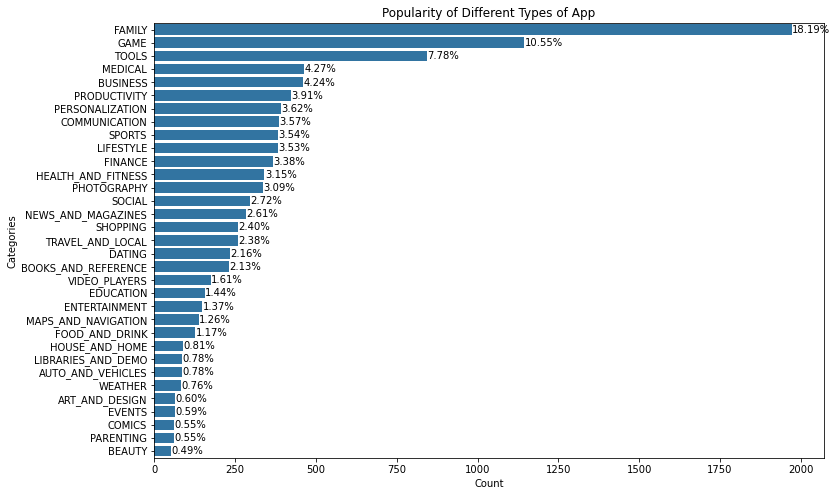

In [21]:
# uniform the corlor
base_color = sb.color_palette()[0]

# set the order of the result
order = df.Category.value_counts().index

# barplot - the category and the Android market
plt.figure(figsize = [12,8])
sb.countplot(data = df, y = 'Category', color = base_color, order = order);

plt.title('Popularity of Different Types of App')
plt.xlabel('Count')
plt.ylabel('Categories')

# add the percentage
num_type = len(df.Category.value_counts())
for i in range (num_type):
    count = df.Category.value_counts()[i]
    plt.text(count+1, i, '{:.2f}%'.format(count * 100 /df.shape[0]), va = 'center')

The bar plot reveals that there 33 types of App in the current Android market. The number of each category range from about 55 to 1900. Among those types, the Family, Game and Tools are the top three most popular Apps, occupying the market with 18.09%, 10.55% and 7.78% respectively.

#### How is the percentage of Free and Paid App in the Android market?
#### How is the size of Apps distributed?

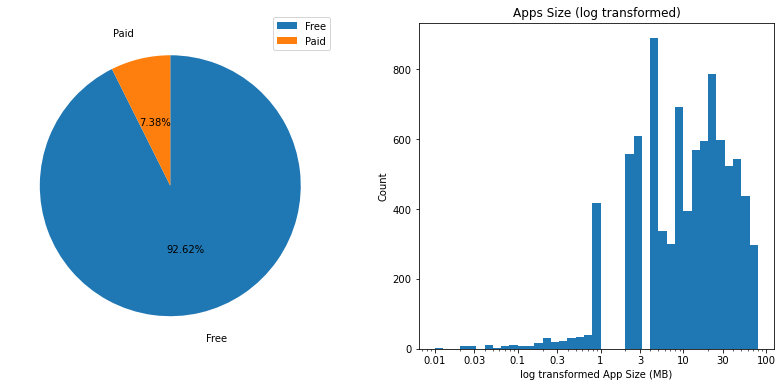

In [22]:
# pie chart - percentage of Free or Paid App
# draw the pie chart in order
plt.figure(figsize = [14,6])

plt.subplot(1,2,1)
sorted_counts = df['Type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%.2f%%', startangle = 90,
        counterclock = False, pctdistance=0.5, labeldistance=1.2);
plt.legend(bbox_to_anchor=(0.8, 0.9));

# hist = distribution of App sizes
plt.subplot(1,2,2)

bins = 10 ** np.arange(-2, 2, 0.1)
ticks = [0.01,0.03,0.1,0.3,1,3,10,30,100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'Size', bins = bins);
# the size (range from 0.01 to 100) should be log transformation
plt.xscale('log')
plt.xticks(ticks, labels);
plt.title('Apps Size (log transformed)');
plt.xlabel('log transformed App Size (MB)');
plt.ylabel('Count');

The pie chart reveal that most of Apps (92.62%) in the Android market are free to download.

The log transformed histogram reveal that the App Size is bimodel, with peak at around 4MB and 28 MB.

#### How is the rating score (quality) distributed in Android market? Would it skewed to any side?
#### How is the number of installs (popularity) distributed in Android market?

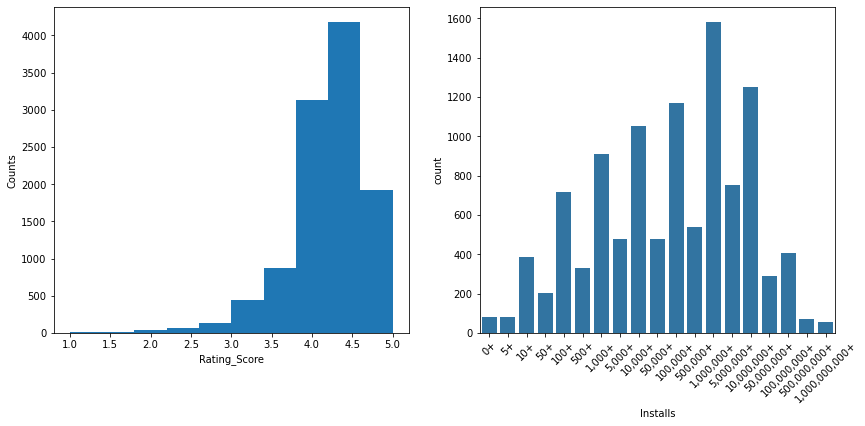

In [23]:
# hist - distribution of rating score
plt.figure(figsize = [14,6])

plt.subplot(1,2,1)
plt.hist(data = df, x = 'Rating');
plt.xlabel('Rating_Score')
plt.ylabel('Counts')

# bar - distribution of number of install
plt.subplot(1,2,2)
# set Installs in order
install_order = ['0+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+','50,000+','100,000+','500,000+','1,000,000+','5,000,000+','10,000,000+','50,000,000+','100,000,000+','500,000,000+','1,000,000,000+']
install_order = pd.api.types.CategoricalDtype(categories = install_order, ordered = True)
df['Installs'] = df.Installs.astype(install_order)

sb.countplot(data = df, x = 'Installs',color = base_color);
plt.xticks(rotation = 45);

The left histogram reveals that the rating score is strongly lefr skewed, with peak around 4.2.

The right bar chart is kind of tricky since the gap between adjacent ticks are differnt. However, it still demonstrates that the number of installs is left skewed, with the peak located between 1,000,000 and 5,000,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For the App features:
- The family, game and tools are the most popular categories in Android market;
- Most of Apps are free to download;
- The size of Apps reveals huge range (0.01MB to 100MB), and peaks at 4MB and 28MB

For the User feedback:
- The rating score is left skewed and peaked at around 4.2 (with 5 as full score);
- The distribution of installs is left skewed, with peak between 1,000,000 and 5,000,000

The distribution of size of Apps strongly right skewed. A log transformation was performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unusual distributions of the invested features. Only order parameter was set to keep the number of install located from small to large.

<a id = 'bi'></a>
## Bivariate Exploration
The bivariate exploration would be applied in this part to explore the relationship between app features and relevant user feedback:
- Are the paid Apps have higher mean rating score than free Apps?
- What are the rating scores for the most three popoular App categories (Family, Game and Tools)?
- Is there a relationship between App size and rating score?

#### Are the paid Apps have higher rating score than free Apps?

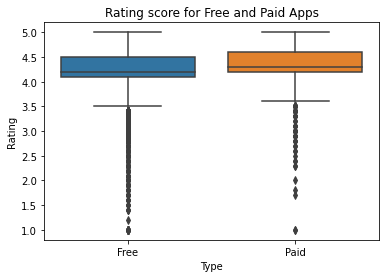

In [24]:
# boxplot - type and rating
sb.boxplot(data = df, x = 'Type', y = 'Rating');

plt.title('Rating score for Free and Paid Apps');

The boxplot revealed that paid Apps had a slightly higher median rating score than that of free apps. This can be explained by many outliers below minmun score in Free Apps.

#### What are the rating scores for the most three popoular App categories (Family, Game and Tools)?

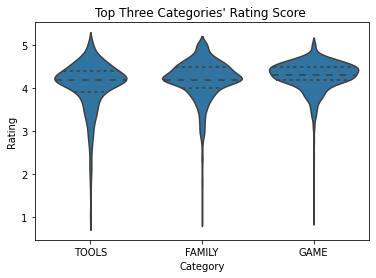

In [25]:
# create a sub datefrome only with top three categories
df_sub = df.loc[df['Category'].isin(['FAMILY','GAME','TOOLS'])]

# violin plor - categories and score
sb.violinplot(data = df_sub, x = 'Category', y = 'Rating',
             inner = 'quartile',color = base_color)
plt.title("Top Three Categories' Rating Score ");

Game Apps revealed a slightly higher rating score than tools and family categories, with median scored around 4.2. And it is interesting to see all of these categories have a "long tail" - many outliers below the minmun rating score. 

#### Is there a relationship between App size and rating score?

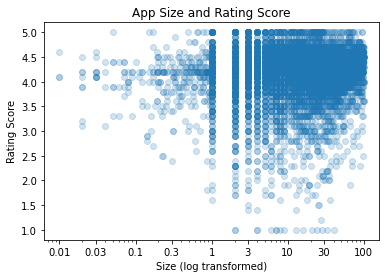

In [26]:
# scatter plot - size and rating score
plt.scatter(data = df, x = 'Size', y = 'Rating',alpha = 0.2);

ticks = [0.01,0.03,0.1,0.3,1,3,10,30,100]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks,labels);
plt.title('App Size and Rating Score');
plt.xlabel('Size (log transformed)');
plt.ylabel('Rating Score');

The scatter plot revealed that there is no clear linear relationship between size and rating score. For the Apps with small sizes are always scored higher than 3, however, the low score Apps are always consist of Apps with big sizes. This may because people have more expectations for Apps with big sizes.

<a id = 'multi'></a>
## Multivariate Exploration
The multivariate exploration was conducted in this part to reveal the relationship between rating_score, top-three categories and App size.

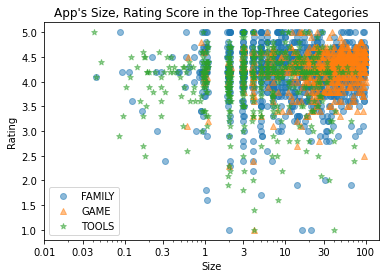

In [27]:
# usting shape to distinguish the top-three categories
ttype_markers = [['FAMILY','o'],
                ['GAME','^'],
                ['TOOLS','*']]
df_sub2 = df_sub.sample(3000)
for ttype, marker in ttype_markers:
    plot_data = df_sub2.loc[df_sub['Category'] == ttype]
    sb.regplot(data = plot_data, x = 'Size', y = 'Rating',
              fit_reg = False, marker = marker, scatter_kws = {'alpha':0.5},
              x_jitter = 0.1);
    plt.xscale('log')
    ticks = [0.01,0.03,0.1,0.3,1,3,10,30,100]
    labels = ['{}'.format(v) for v in ticks]
    plt.xticks(ticks,labels)
plt.title("App's Size, Rating Score in the Top-Three Categories")
plt.legend(['FAMILY','GAME','TOOLS']);

The scatter plot with three categories revealed that tool Apps are usually with small size. And the opposite is that most of games are with big sizes. It is clear that the rating for games are higher than family and tools categories. 

jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle